[View in Colaboratory](https://colab.research.google.com/github/MarcinWylot/CryptocurrencyPricePredictor/blob/master/BitcoinPredictWithLSTM.ipynb)

In [1]:
import requests
import json
import calendar
import random 
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, MaxPooling1D, LeakyReLU, PReLU
from keras.utils import np_utils
from keras.callbacks import CSVLogger, ModelCheckpoint
import h5py
import os
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error, mean_absolute_error
import math 


Using TensorFlow backend.


In [12]:
url = 'https://min-api.cryptocompare.com/data/histohour?tsym=USD&limit=9999&fsym=BTC'
response = requests.get(url)

json_array = json.loads(response.text)

df = pd.DataFrame(json_array['Data'], columns = ['time', 'close', 'high', 'low', 'open', 'volumefrom','volumeto'])
df.head()

,time,close,high,low,open,volumefrom,volumeto
0,1525312800,9252.52,9254.84,9208.29,9235.19,2554.82,23629176.85
1,1525316400,9238.12,9273.19,9224.66,9252.52,3480.43,32210715.82
2,1525320000,9274.97,9291.44,9238.09,9238.09,3157.94,29301783.58
3,1525323600,9206.02,9282.01,9186.41,9274.97,2442.24,22545061.72
4,1525327200,9213.73,9229.21,9172.28,9207.73,2799.05,25779054.98


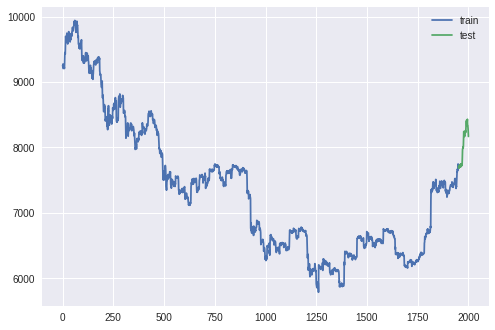

In [13]:
train, test = df[:-49], df[-50:]

plt.plot(train['close'], label='train')
plt.plot(test['close'], label='test')
plt.legend(loc='best')